<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/matplotlib_fluo_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fluorescence sample graphs
###prompt fluorescence


Upload .csv flie

In [ ]:
import io

from google.colab import files
uploaded = files.upload()

Saving OJIP-0703.csv to OJIP-0703 (1).csv


import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

read csv and setting the delimiter and decimal separator

renaming column names

Dataset is now stored in a Pandas Dataframe

In [ ]:
# PAM
#df_PAM = pd.read_csv(io.BytesIO(uploaded['I_091204_091508.csv']), delimiter=';', decimal='.')
df_PAM = pd.read_csv("/content/NPQ2-0703.csv", delimiter=';', decimal='.')

In [ ]:
# PF
df_all = pd.read_csv("/content/OJIP-0703.csv", delimiter=';', decimal=',')

In [ ]:
# NO
df_l = df_all.drop(['bakla', 'echemik'], axis = 1)
df_b = df_all.drop(['lupina', 'echemik'], axis = 1)
df_e = df_all.drop(['bakla', 'lupina'], axis = 1)

In [ ]:
# NO
df_all = df_all.rename({ 'time': 'PF' }, axis=1)


In [ ]:
#t = df_MR['MR820'][:144].str.replace(',', '.').astype(float)
#df_MR['MR820'][:144] = t
df_MR

,time,MR820
0,0.02,0.999864
1,0.03,0.999864
2,0.04,0.999877
3,0.05,0.999898
4,0.06,0.999877
...,...,...
144,NaN,NaN
145,NaN,NaN
146,NaN,NaN
147,NaN,NaN


specifying OKJIP points

In [ ]:
# PF
hl = df_all.loc[df_all['time'].isin([21, 211, 2021, 30321, 301621])]
hl['points'] = ['O', 'K', 'J', 'I', 'P']
hl

<ipython-input-242-730d67838fed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hl['points'] = ['O', 'K', 'J', 'I', 'P']


,time,bakla,lupina,echemik,falaris,points
0,21,13465.6,7899.75,12029,11130.500,O
19,211,24597.4,11329.50,20709,18742.125,K
70,2021,43057.2,22127.25,37485,32433.250,J
205,30321,55047.2,36090.75,60470,45234.500,I
286,301621,63298.2,51042.00,70906,54573.250,P


In [ ]:
# PAM
#df_PAM['Time'] = df_PAM['Time'] / 60

# convert NPQ2 data to numeric
df_PAM = df_PAM.apply (pd.to_numeric, errors='coerce')
# drop Nan rows
df_PAM = df_PAM.dropna()
# reset the indexes of the remaining rows
df_PAM = df_PAM.reset_index(drop=True)

df_PAM['time'] = df_PAM['time'].astype('int') / 36000000
# PAM '/ 60' ; FluorPen '/ 36000000

Drawing plot from the DataFrame

In [ ]:
def Draw_plot(df):
  time = df.columns.values[0]
  fluo = df.columns.values[3]

  df.plot(kind = 'line', color='black', x = time, y = fluo)

Formatting graph

In [ ]:
def Format_graph(fluo):
  #remove legend
  plt.legend('').remove()
  if fluo == 'PF':
    #graph title
    plt.title('Prompt fluorescence', fontweight="bold", fontsize=14)
    #convert x-axis to Logarithmic scale
    plt.xscale("log")
    #start y axis from 0
    plt.ylim(ymin=0)
    #format axis labels
    plt.xlabel('JIP-time [ms]', fontweight="bold", fontsize=12)
    plt.ylabel('fluorescence intensity [rel.u.] x${10^3}$', fontweight="bold", fontsize=10)
  if fluo == 'PAM':
    plt.xlim(xmin=0)
    plt.xlim(xmax=18)
    plt.ylim(ymin=0)
    # PAM xmax = 25; FluorPen xmax=175
    #graph title
    plt.title('PAM fluorescence', fontweight="bold", fontsize=14)
    #format axis labels
    plt.xlabel('time [min]', fontweight="bold", fontsize=12)
    plt.ylabel('fluorescence [a.u.]', fontweight="bold", fontsize=10)
  if fluo == 'MR820':
    #graph title
    plt.title('', fontweight="bold", fontsize=14)
    #convert x-axis to Logarithmic scale
    plt.xscale("log")
    #start y axis from 0
    ax1.set_ylim(ymin=0)
    ax3.set_ylim(.993, 1.0005)
    #format axis labels
    plt.xlabel('JIP-time [ms]', fontweight="bold", fontsize=12)
    ax1.set_ylabel('fluorescence intensity [rel.u.] x${10^3}$', fontweight="bold", fontsize=10)
    ax3.set_ylabel('MR/MR${_0}$ [rel.u.]', fontweight="bold", fontsize=10)

Formatting axes

In [ ]:
from matplotlib.ticker import MultipleLocator

def Ticker(n, ticker, axis):
  ml = MultipleLocator(n)
  if axis == 'x' and ticker == 'minor':
    plt.gca().xaxis.set_minor_locator(ml)
  if axis == 'y' and ticker == 'minor':
    plt.gca().yaxis.set_minor_locator(ml)
  if axis == 'x' and ticker == 'major':
    plt.gca().xaxis.set_major_locator(ml)
  if axis == 'y' and ticker == 'major':
    plt.gca().yaxis.set_major_locator(ml)

In [ ]:
def Format_axes():
  # For the X Axis
  plt.tick_params(
          axis="x",
      which="minor",
      direction='in',
      )

  plt.tick_params(
          axis="x",
      which="major",
      direction='inout',
      )

  # For the Y Axis
  plt.tick_params(
          axis="y",
      which="major",
      direction='inout',
      )

  plt.tick_params(
          axis="y",
      which="minor",
      #length=10,
      #color="b",
      direction='in',
      #labelrotation=45.0
      )

### Prompt fluorescence

Inserting OKJIP points and visualize

In [ ]:
hl.iloc(1)

In [ ]:
def Draw_points():
  x = hl['time'].to_numpy()
  y = hl['echemik'].to_numpy()
  for i, txt in enumerate(hl['points']):
    plt.annotate(txt, (x[i], y[i]), weight='bold', xytext=(x[i], y[i]-5), size=14)

In [ ]:
plt.rcParams["figure.dpi"] = 600 # resolution 600 dpi

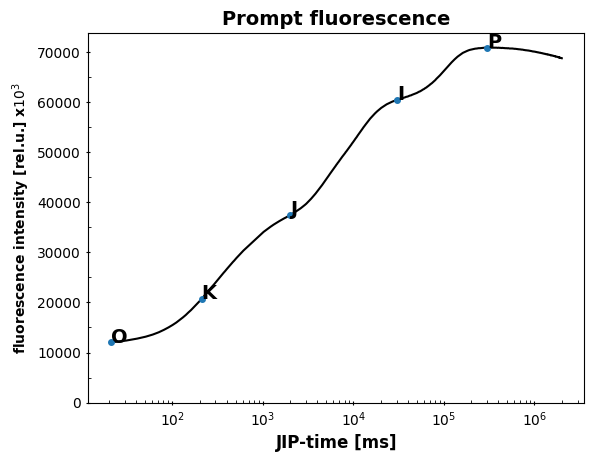

In [ ]:
Draw_plot(df_all)

Format_graph('PF')
Format_axes()
Ticker(5000, 'minor', 'y')

plt.plot(hl['time'], hl['echemik'], marker="o", ls="", ms=4)

Draw_points()

plt.show()

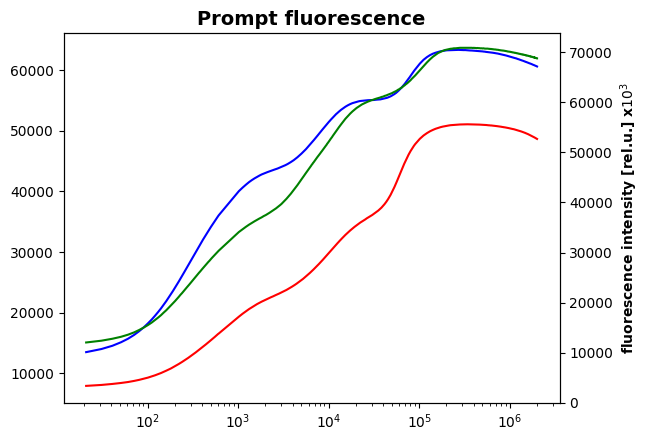

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(df_all['PF'], df_all['lupina'], color='red')
ax1.plot(df_all['PF'], df_all['bakla'], color='blue')

ax3 = ax1.twinx()
ax3.plot(df_all['PF'], df_all['echemik'], color='green')

Format_graph('PF')

plt.show()

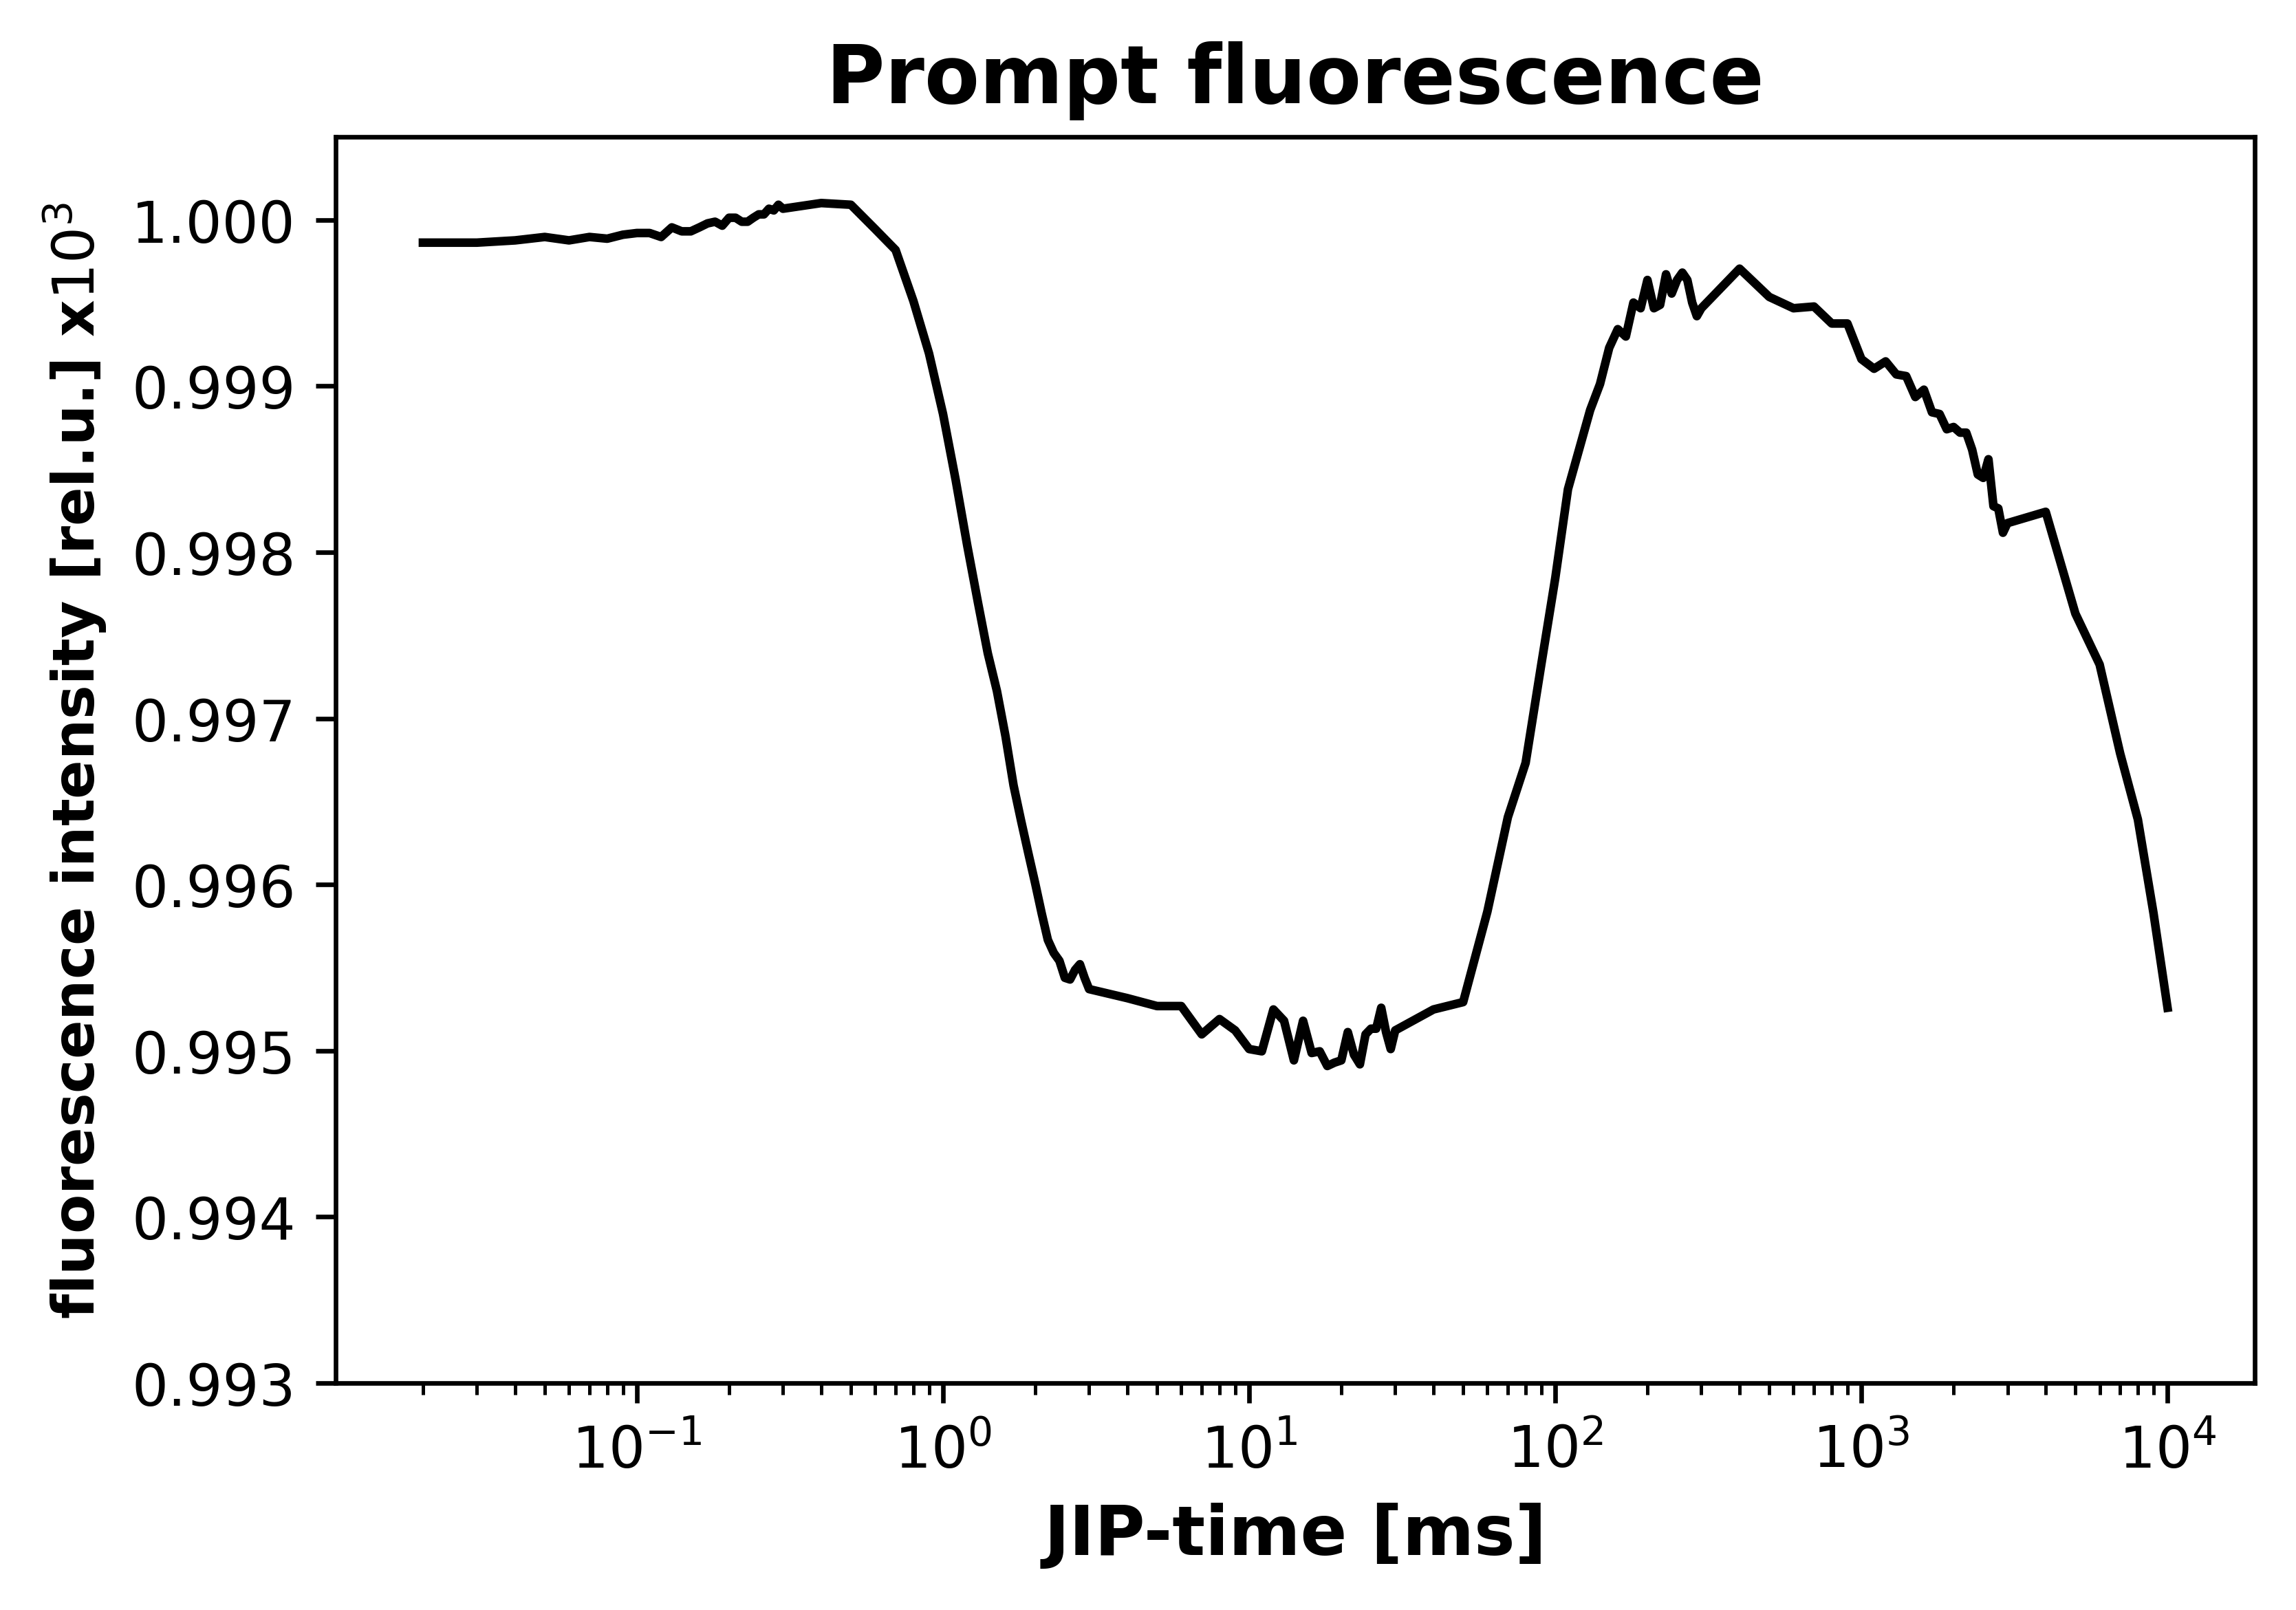

In [ ]:
Draw_plot(df_MR)
Format_graph('PF')
plt.ylim(ymin=0.993, ymax=1.0005)
plt.show()

In [ ]:
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

def Draw_line(x, y, c):

  plt.gca().add_patch(Rectangle((x), y, 4000, facecolor = c))

In [ ]:
df_PAM['NPQ2']

0       6242.0
1       6404.0
2       6470.0
3       6567.0
4      31828.0
        ...   
245    13622.0
246    12451.0
247    11867.0
248    11542.0
249    11281.0
Name: NPQ2, Length: 250, dtype: float64

<ipython-input-191-48a5a7081aba>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x,y = np.array([[0.0, 0], 18.0])
<ipython-input-191-48a5a7081aba>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x,y = np.array([[0.6, 0], 5.6])


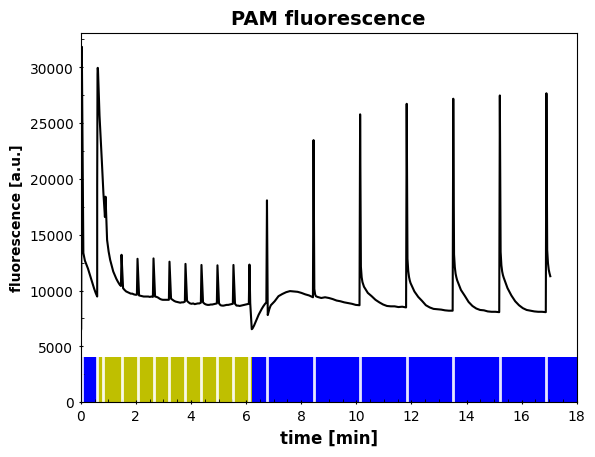

In [ ]:
#PAM

Draw_plot(df_PAM)

Format_graph('PAM')
Format_axes()

Ticker(0.5, ticker='minor', axis='x')
Ticker(2500, ticker='minor', axis='y')
#Ticker(1000, ticker='major', axis='y')

x,y = np.array([[0.0, 0], 18.0])
Draw_line(x, y, 'b')
x,y = np.array([[0.6, 0], 5.6])
Draw_line(x, y, 'y')

i = 0
while(i < df_PAM['NPQ2'].size):
  if df_PAM['NPQ2'][i] > 12000:
    line = Line2D([df_PAM['time'][i], df_PAM['time'][i]], [0, 4000], lw=2., color='w', alpha=0.9)
    plt.gca().add_line(line)

    i += 10
  i += 1

plt.show()